In [36]:
import pandas as pd
import matplotlib.pyplot as plt


produtos_df = pd.read_csv(r"Contoso - Cadastro Produtos.csv", sep=";", encoding="latin1")
clientes_df = pd.read_csv(r"Contoso - Clientes.csv", sep=";", encoding="latin1")
lojas_df = pd.read_csv(r"Contoso - Lojas.csv", sep=";", encoding="latin1")
promocoes_df = pd.read_csv(r"Contoso - Promocoes.csv", sep=";", encoding="latin1")
vendas_df = pd.read_csv(r"Contoso - Vendas - 2017.csv", sep=";", encoding="latin-1")
vendas_df.info()

lista_clientes = vendas_df['ID Cliente']
lista_clientes
lista_colunas = ["ID Cliente", "ID Produto", "Quantidade Vendida"]
produtos_quantidade = vendas_df[lista_colunas]
vendas_df



<class 'pandas.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Numero da Venda       980642 non-null  int64
 1   Data da Venda         980642 non-null  str  
 2   Data do Envio         980642 non-null  str  
 3   ID Canal              980642 non-null  int64
 4   ID Loja               980642 non-null  int64
 5   ID Produto            980642 non-null  int64
 6   ID Promocao           980642 non-null  int64
 7   ID Cliente            980642 non-null  int64
 8   Quantidade Vendida    980642 non-null  int64
 9   Quantidade Devolvida  980642 non-null  int64
dtypes: int64(8), str(2)
memory usage: 74.8 MB


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


In [3]:
## pegar apenas as colunas que eu quero de um dataframe

clientes_df = clientes_df[["ID Cliente", "E-mail"]]
produtos_df = produtos_df[["ID Produto", "Nome do Produto"]]
lojas_df = lojas_df[["ID Loja", "Nome da Loja"]]

## Ai vou adicionar essas novas colunas no meu dataframe de vendas metodo merge. ID Cliente, ID Produto e ID Loja sao chaves primarias faz como se fosse um procv

vendas_df = vendas_df.merge(clientes_df, on="ID Cliente")
vendas_df = vendas_df.merge(produtos_df, on="ID Produto")
vendas_df = vendas_df.merge(lojas_df, on="ID Loja")

## renomear uma coluna

vendas_df = vendas_df.rename(columns={"E-mail": "E-Mail do Cliente"})



<Axes: xlabel='ID Cliente'>

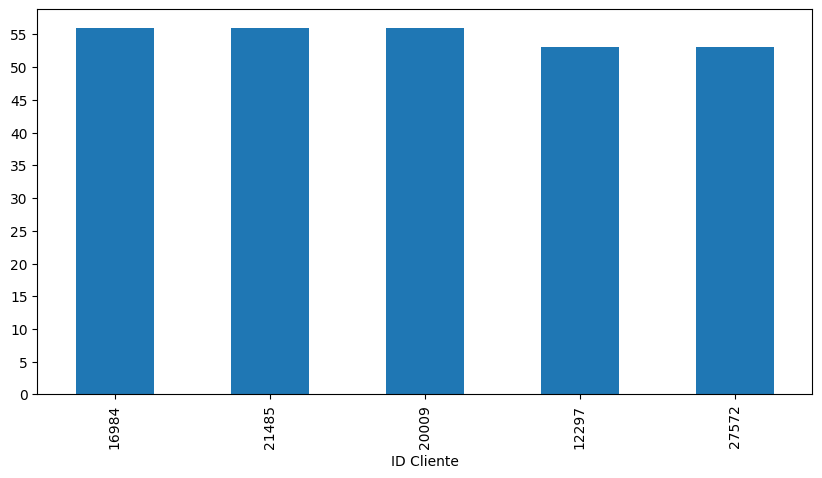

In [9]:
## Qual cliente comprou mais vezes?

frequencia_cliente = vendas_df["ID Cliente"].value_counts()
frequencia_cliente
frequencia_cliente[:5].plot(figsize=(10, 5), kind="bar", yticks=range(0, 60, 5))

<Axes: xlabel='Nome da Loja'>

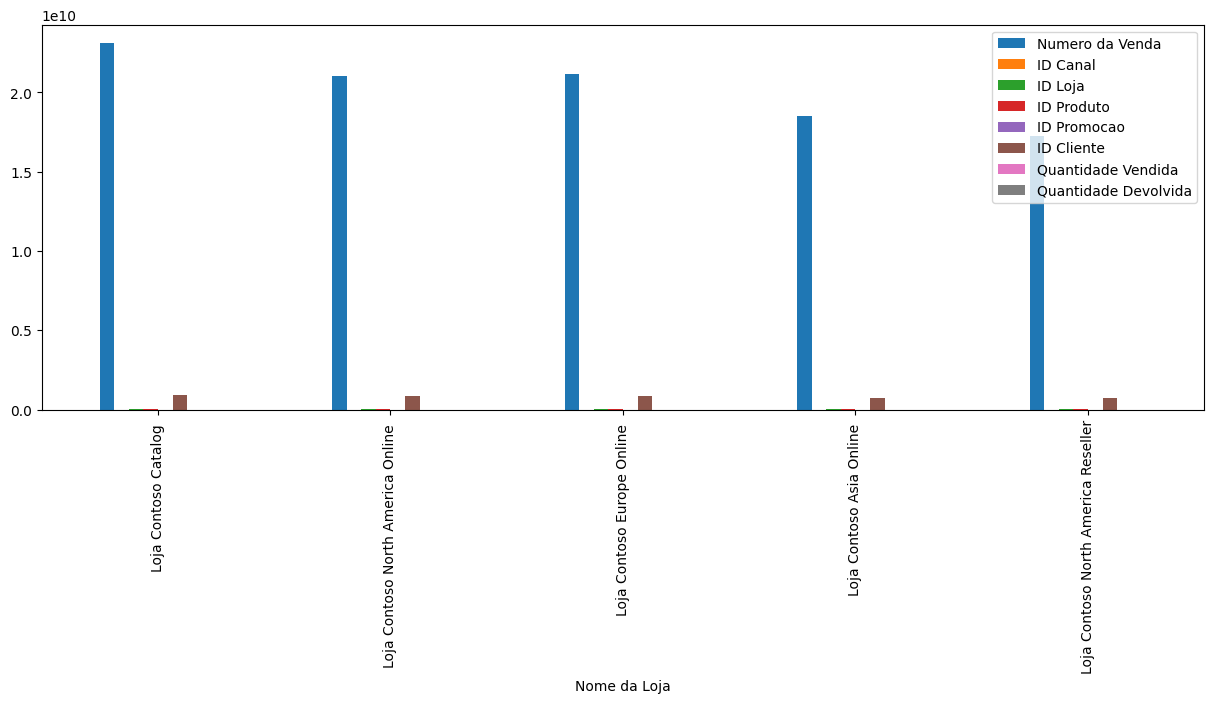

In [28]:
## Qual a loja que mais vendeu? Usando groupy
vendas_loja = vendas_df.groupby("Nome da Loja").sum()
vendas_loja = vendas_loja.sort_values("Quantidade Vendida", ascending=False)
vendas_loja[:5].plot(figsize=(15, 5), kind="bar")



In [ ]:
## Pegando o maior valor
maior_valor = vendas_loja["Quantidade Vendida"].max()
melhor_loja = vendas_loja["Quantidade Vendida"].idxmax()
print(f"A melhor loja foi {melhor_loja} com {maior_valor} unidades vendidas.")




A melhor loja foi Loja Contoso Catalog  com 1029117 unidades vendidas.
O produto menos vendido foi SV 16xDVD E340 Silver com 86 unidades vendidas.


In [39]:
## QUAL O O % DAS VENDAS QUE FOI DEVOLVIDA?
qtd_vendida = vendas_df["Quantidade Vendida"].sum()
qtd_devolvida = vendas_df["Quantidade Devolvida"].sum()
print(f"O percentual de devoluções foi de {qtd_devolvida / qtd_vendida:.2%}")

O percentual de devoluções foi de 1.17%


In [41]:
## FAzer a mesma analise apenas para uma loja

vendas_lojas306 = vendas_df[vendas_df["ID Loja"] == 306]
qtd_vendida306 = vendas_lojas306["Quantidade Vendida"].sum()
qtd_devolvida306 = vendas_lojas306["Quantidade Devolvida"].sum()
print(f"O percentual de devoluções foi de {qtd_devolvida306 / qtd_vendida306:.2%}")
display(vendas_lojas306)   

O percentual de devoluções foi de 1.33%


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
98,99,01/01/2017,03/01/2017,2,306,1269,10,26238,8,0
165,166,01/01/2017,02/01/2017,1,306,1107,10,7242,16,0
166,167,01/01/2017,05/01/2017,4,306,242,10,34277,16,0
186,187,01/01/2017,06/01/2017,5,306,1479,10,23132,8,0
198,199,01/01/2017,03/01/2017,2,306,819,10,5363,4,0
...,...,...,...,...,...,...,...,...,...,...
980579,980580,31/12/2017,06/01/2018,6,306,771,10,6539,8,0
980580,980581,31/12/2017,01/01/2018,1,306,591,10,32061,8,0
980581,980582,31/12/2017,31/12/2017,0,306,1388,10,22838,8,0
980582,980583,31/12/2017,03/01/2018,3,306,1354,10,33450,8,0


In [43]:
## outra forma de fazer a mesma analise usando variavel
loja306 = vendas_df["ID Loja"] == 306
vendas_lojas306 = vendas_df[loja306]
qtd_vendida306 = vendas_lojas306["Quantidade Vendida"].sum()
qtd_devolvida306 = vendas_lojas306["Quantidade Devolvida"].sum()
print(f"O percentual de devoluções foi de {qtd_devolvida306 / qtd_vendida306:.2%}")
display(vendas_lojas306)

O percentual de devoluções foi de 1.33%


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
98,99,01/01/2017,03/01/2017,2,306,1269,10,26238,8,0
165,166,01/01/2017,02/01/2017,1,306,1107,10,7242,16,0
166,167,01/01/2017,05/01/2017,4,306,242,10,34277,16,0
186,187,01/01/2017,06/01/2017,5,306,1479,10,23132,8,0
198,199,01/01/2017,03/01/2017,2,306,819,10,5363,4,0
...,...,...,...,...,...,...,...,...,...,...
980579,980580,31/12/2017,06/01/2018,6,306,771,10,6539,8,0
980580,980581,31/12/2017,01/01/2018,1,306,591,10,32061,8,0
980581,980582,31/12/2017,31/12/2017,0,306,1388,10,22838,8,0
980582,980583,31/12/2017,03/01/2018,3,306,1354,10,33450,8,0


In [49]:
## Desafio : Crie uma tabela apenas com as vendas da loja contoso europe online e que nao tiveram nenhuma devolucao.

#tudo junto e depois tudo separado
df_loja306semdev = vendas_df[(vendas_df["ID Loja"] == 306) & (vendas_df["Quantidade Devolvida"] == 0)]
display(df_loja306semdev)

#Separado
loja306 = vendas_df["ID Loja"] == 306
sem_devolucao = vendas_df["Quantidade Devolvida"] == 0
df_loja306semdev = vendas_df[loja306 & sem_devolucao]
display(df_loja306semdev)


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
98,99,01/01/2017,03/01/2017,2,306,1269,10,26238,8,0
165,166,01/01/2017,02/01/2017,1,306,1107,10,7242,16,0
166,167,01/01/2017,05/01/2017,4,306,242,10,34277,16,0
186,187,01/01/2017,06/01/2017,5,306,1479,10,23132,8,0
198,199,01/01/2017,03/01/2017,2,306,819,10,5363,4,0
...,...,...,...,...,...,...,...,...,...,...
980579,980580,31/12/2017,06/01/2018,6,306,771,10,6539,8,0
980580,980581,31/12/2017,01/01/2018,1,306,591,10,32061,8,0
980581,980582,31/12/2017,31/12/2017,0,306,1388,10,22838,8,0
980582,980583,31/12/2017,03/01/2018,3,306,1354,10,33450,8,0


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
98,99,01/01/2017,03/01/2017,2,306,1269,10,26238,8,0
165,166,01/01/2017,02/01/2017,1,306,1107,10,7242,16,0
166,167,01/01/2017,05/01/2017,4,306,242,10,34277,16,0
186,187,01/01/2017,06/01/2017,5,306,1479,10,23132,8,0
198,199,01/01/2017,03/01/2017,2,306,819,10,5363,4,0
...,...,...,...,...,...,...,...,...,...,...
980579,980580,31/12/2017,06/01/2018,6,306,771,10,6539,8,0
980580,980581,31/12/2017,01/01/2018,1,306,591,10,32061,8,0
980581,980582,31/12/2017,31/12/2017,0,306,1388,10,22838,8,0
980582,980583,31/12/2017,03/01/2018,3,306,1354,10,33450,8,0


In [50]:
## transformar objeto em data
vendas_df["Data da Venda"] = pd.to_datetime(vendas_df["Data da Venda"], format="%d/%m/%Y")
vendas_df["Ano da Venda"] = vendas_df["Data da Venda"].dt.year
vendas_df["Mes da Venda"] = vendas_df["Data da Venda"].dt.month
vendas_df["Dia da Venda"] = vendas_df["Data da Venda"].dt.day

In [52]:
display(produtos_df)

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


In [53]:
## LOC E ILOC = TRANSFORMAR E PEGAR INFORMAÇÕES DE UM DATAFRAME
#LOC USA O NOME DAS COLUNAS E ILOC USA O INDICE DAS COL

novo_produtos_df = produtos_df.set_index("Nome do Produto")
display(novo_produtos_df.loc["Contoso Wireless Laser Mouse E50 Grey"])

Descricao do Produto    Advanced 2.4 GHz cordless technology makes fre...
Fabricante                                                   Contoso, Ltd
Nome da Marca                                                     Contoso
Tipo                                                            Econômico
Custo Unitario                                                      10,69
Preco Unitario                                                      20,96
ID Produto                                                            873
ID Subcategoria                                                        22
Name: Contoso Wireless Laser Mouse E50 Grey, dtype: object

In [ ]:
## transformar dicionario em dataframe
## vendas_pd.DataFrame.from_dict(vendas_produtos, orient='index')
## renomear colunas de um dataframe = vendas_df = vendas_df.rename(columns={"E-mail": "E-Mail do Cliente"})


In [ ]:
## Baixar csv da internet
##url = "https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv"
##vendas_df = pd.read_csv(url)



In [61]:
## Vai funcionar quando o link ja faz direto o download do arquivo csv
## Caso nao seja a pagina direta do csv, usar a biblioteca requests para baixar o arquivo primeiro
## import requests e import io

import requests
import io

url = "https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv"
conteudo_url = requests.get(url).content
vendas_df = pd.read_csv(io.StringIO(conteudo_url.decode('utf-8')))
display(vendas_df)


,Index,"Height(Inches)""","""Weight(Pounds)"""
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30
...,...,...,...
195,196,65.80,120.84
196,197,66.11,115.78
197,198,68.24,128.30
198,199,68.02,127.47
